# Pandemic Preparedness Analysis - COVID and Demographics Table

### Demographics: Median Age, College Degree Attainment, Per Capita Income, Population, Covid Cases, Covid Deaths, and Covid Vaccinations

In [1]:
#Dependencies
import pandas as pd
import requests
import json
import os
import numpy
import random
from config import apikey

In [2]:
#Pull in data

# - edu by county to be grouped into cbsas
ny = "NY Education.csv"
nj = "NJ Education.csv"
pa = "PA Education.csv"
tx = "Texas Education.csv"

#Demographics by cbsa
demographics = "age_sex_demo.csv"
money = "income.csv"

#Cases by cbsa
#https://api.covidactnow.org/v2/cbsas.json?apiKey={apiKey}
cbsa_url = f"https://api.covidactnow.org/v2/cbsas.csv?apiKey={apikey}"


In [3]:
#read in CSVs

ny_edu = pd.read_csv(ny)
nj_edu = pd.read_csv(nj)
pa_edu = pd.read_csv(pa)
tx_edu = pd.read_csv(tx)
demo_info = pd.read_csv(demographics, encoding='latin-1')
income = pd.read_csv(money, encoding='latin-1')

### Education Tables Clean Up

In [4]:
ny_edu.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPS,Name,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,NaN,2016-2020
2,36000,New York,NaN,11.9%,17.9%,23.1%,27.4%,NaN,37.5%


In [5]:
# make second row header row

headers = 1
ny_edu.columns = ny_edu.iloc[headers]
nj_edu.columns = nj_edu.iloc[headers]
pa_edu.columns = pa_edu.iloc[headers]
tx_edu.columns = tx_edu.iloc[headers]

In [6]:
ny_edu.head(3)

1,FIPS,Name,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,NaN,2016-2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPS,Name,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,NaN,2016-2020
2,36000,New York,NaN,11.9%,17.9%,23.1%,27.4%,NaN,37.5%


In [7]:
# delete first three rows
ny_edu = ny_edu.drop(labels = [0,1,2], axis =0)
nj_edu = nj_edu.drop(labels = [0,1,2], axis =0)
pa_edu = pa_edu.drop(labels = [0,1,2], axis =0)
tx_edu = tx_edu.drop(labels = [0,1,2], axis =0)

In [8]:
ny_edu.head(3)

1,FIPS,Name,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,NaN,2016-2020
3,36001,"Albany, NY",2,13.8%,22.3%,28.3%,33.3%,NaN,43.6%
4,36003,"Allegany, NY",7,11.3%,13.6%,15.6%,17.2%,NaN,22.9%
5,36005,"Bronx, NY",1,6.2%,9.1%,12.2%,14.6%,NaN,20.3%


In [9]:
ny_edu ['State'] = "NY" 
nj_edu ['State'] = "NJ" 
pa_edu ['State'] = "PA" 
tx_edu ['State'] = "TX"

In [10]:
ny_edu.head(2)

1,FIPS,Name,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,NaN,2016-2020,State
3,36001,"Albany, NY",2,13.8%,22.3%,28.3%,33.3%,NaN,43.6%,NY
4,36003,"Allegany, NY",7,11.3%,13.6%,15.6%,17.2%,NaN,22.9%,NY


In [11]:
list(tx_edu)

['FIPS',
 'Name',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 nan,
 '2016-2020',
 'State']

In [12]:
#reorder columns
ny_edu = ny_edu [['FIPS',
 'Name', 'State',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 '2016-2020']]
nj_edu = nj_edu [['FIPS',
 'Name', 'State',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 '2016-2020']]
pa_edu = pa_edu [['FIPS',
 'Name', 'State',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 '2016-2020']]
tx_edu = tx_edu [['FIPS',
 'Name', 'State',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 '2016-2020']]

In [13]:
ny_edu.head(2)

1,FIPS,Name,State,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,2016-2020
3,36001,"Albany, NY",NY,2,13.8%,22.3%,28.3%,33.3%,43.6%
4,36003,"Allegany, NY",NY,7,11.3%,13.6%,15.6%,17.2%,22.9%


In [14]:
# rename values in 'name' column to XX County (eg: Albany County)

ny_edu['Name'] = ny_edu['Name'].str.replace(', NY',' County')
nj_edu['Name'] = nj_edu['Name'].str.replace(', NJ',' County')
pa_edu['Name'] = pa_edu['Name'].str.replace(', PA',' County')
tx_edu['Name'] = tx_edu['Name'].str.replace(', TX',' County')

In [15]:
tx_edu.head(2)

1,FIPS,Name,State,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,2016-2020
3,48001,Anderson County,TX,7,22.0%,28.7%,30.9%,28.2%,39.0%
4,48003,Andrews County,TX,6,32.7%,29.2%,27.8%,32.6%,33.4%


In [16]:
edu_rates=pd.concat([ny_edu, nj_edu, pa_edu, tx_edu])


In [17]:
#create new column for core-based statistical area (CBSA)
cbsa= []
for value in edu_rates['FIPS']:
    if value == '36047' or value == '36081' or value == '36061' or value == '36005' or value == '36057' or value == '36119' \
    or value == '34003' or value == '34017' or value == '34031' or value == '36076' or value == '36087' or value == '36103' \
    or value == '36059' or value == '34023' or value == '34025' or value == '34029' or value == '34035' or value == '34013' \
    or value == '34039' or value == '34027' or value == '34037' or value == '34019' or value == '42103':
        cbsa.append('35620')  
    elif value == '36001' or value == '36021' or value == '36035' or value == '36039' or value == '36057' \
    or value == '36083' or value == '36091' or value == '36093' or value == '36095' or value == '36113' or value == '36115':
        cbsa.append('10580')  
    elif value == '36007' or value == '36107':
        cbsa.append('13780')
    elif value == '48085' or value == '48113' or value == '48121' or value == '48139' or value == '48231' \
    or value == '48257' or value == '48397' or value == '48251' or value == '48367' or value == '48439' or value == '48497':
        cbsa.append('19100')
    elif value == '48215': 
        cbsa.append('32580')
    elif value == '48011' or value == '48357' or value == '48381' or value == '48359':
        cbsa.append('11100')
    else:
         cbsa.append('na')

In [18]:
edu_rates['CBSA'] = cbsa

In [19]:
edu_rates.head()

1,FIPS,Name,State,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,2016-2020,CBSA
3,36001,Albany County,NY,2,13.8%,22.3%,28.3%,33.3%,43.6%,10580
4,36003,Allegany County,NY,7,11.3%,13.6%,15.6%,17.2%,22.9%,na
5,36005,Bronx County,NY,1,6.2%,9.1%,12.2%,14.6%,20.3%,35620
6,36007,Broome County,NY,2,11.2%,15.6%,20.7%,22.7%,28.8%,13780
7,36009,Cattaraugus County,NY,4,7.3%,10.7%,12.8%,14.9%,19.9%,na


### Demo Table Clean up

In [20]:
demo_info.head(5)

,SUMLEV,CBSA,NAME,LSAD,DATE,POPESTIMATE,POPEST_MALE,POPEST_FEMALE,UNDER5_TOTAL,UNDER5_MALE,...,AGE7579_FEMALE,AGE8084_TOTAL,AGE8084_MALE,AGE8084_FEMALE,AGE85PLUS_TOTAL,AGE85PLUS_MALE,AGE85PLUS_FEMALE,MEDIAN_AGE_TOTAL,MEDIAN_AGE_MALE,MEDIAN_AGE_FEMALE
0,310,10180,"Abilene, TX",Metropolitan Statistical Area,1,176579,89269,87310,11879,6000,...,2705,3342,1386,1956,3298,1171,2127,34.1,33.2,35.2
1,310,10180,"Abilene, TX",Metropolitan Statistical Area,2,176809,89408,87401,11847,6002,...,2697,3329,1371,1958,3270,1162,2108,34.2,33.2,35.2
2,310,10180,"Abilene, TX",Metropolitan Statistical Area,3,177314,89671,87643,11430,5845,...,2725,3323,1383,1940,3208,1129,2079,34.3,33.5,35.3
3,310,10420,"Akron, OH",Metropolitan Statistical Area,1,702219,343286,358933,36969,18767,...,11922,14028,5840,8188,14395,5060,9335,40.6,39.5,41.7
4,310,10420,"Akron, OH",Metropolitan Statistical Area,2,701305,342719,358586,36712,18624,...,11987,13994,5820,8174,14254,5036,9218,40.6,39.6,41.7


In [21]:
list(demo_info)

['SUMLEV',
 'CBSA',
 'NAME',
 'LSAD',
 'DATE',
 'POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEMALE',
 'UNDER5_TOTAL',
 'UNDER5_MALE',
 'UNDER5_FEMALE',
 'AGE513_TOTAL',
 'AGE513_MALE',
 'AGE513_FEMALE',
 'AGE1417_TOTAL',
 'AGE1417_MALE',
 'AGE1417_FEMALE',
 'AGE1824_TOTAL',
 'AGE1824_MALE',
 'AGE1824_FEMALE',
 'AGE16PLUS_TOTAL',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEMALE',
 'AGE18PLUS_TOTAL',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEMALE',
 'AGE1544_TOTAL',
 'AGE1544_MALE',
 'AGE1544_FEMALE',
 'AGE2544_TOTAL',
 'AGE2544_MALE',
 'AGE2544_FEMALE',
 'AGE4564_TOTAL',
 'AGE4564_MALE',
 'AGE4564_FEMALE',
 'AGE65PLUS_TOTAL',
 'AGE65PLUS_MALE',
 'AGE65PLUS_FEMALE',
 'AGE04_TOTAL',
 'AGE04_MALE',
 'AGE04_FEMALE',
 'AGE59_TOTAL',
 'AGE59_MALE',
 'AGE59_FEMALE',
 'AGE1014_TOTAL',
 'AGE1014_MALE',
 'AGE1014_FEMALE',
 'AGE1519_TOTAL',
 'AGE1519_MALE',
 'AGE1519_FEMALE',
 'AGE2024_TOTAL',
 'AGE2024_MALE',
 'AGE2024_FEMALE',
 'AGE2529_TOTAL',
 'AGE2529_MALE',
 'AGE2529_FEMALE',
 'AGE3034_TOTAL',
 'AGE3034_MALE',
 'AG

In [22]:
#drop columns
# drop columns (keep - CBSA MEDIAN_AGE_TOTAL)
demo_info = demo_info.drop(columns=['SUMLEV',
 'NAME',
 'LSAD',
 'DATE',
 'POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEMALE',
 'UNDER5_TOTAL',
 'UNDER5_MALE',
 'UNDER5_FEMALE',
 'AGE513_TOTAL',
 'AGE513_MALE',
 'AGE513_FEMALE',
 'AGE1417_TOTAL',
 'AGE1417_MALE',
 'AGE1417_FEMALE',
 'AGE1824_TOTAL',
 'AGE1824_MALE',
 'AGE1824_FEMALE',
 'AGE16PLUS_TOTAL',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEMALE',
 'AGE18PLUS_TOTAL',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEMALE',
 'AGE1544_TOTAL',
 'AGE1544_MALE',
 'AGE1544_FEMALE',
 'AGE2544_TOTAL',
 'AGE2544_MALE',
 'AGE2544_FEMALE',
 'AGE4564_TOTAL',
 'AGE4564_MALE',
 'AGE4564_FEMALE',
 'AGE65PLUS_TOTAL',
 'AGE65PLUS_MALE',
 'AGE65PLUS_FEMALE',
 'AGE04_TOTAL',
 'AGE04_MALE',
 'AGE04_FEMALE',
 'AGE59_TOTAL',
 'AGE59_MALE',
 'AGE59_FEMALE',
 'AGE1014_TOTAL',
 'AGE1014_MALE',
 'AGE1014_FEMALE',
 'AGE1519_TOTAL',
 'AGE1519_MALE',
 'AGE1519_FEMALE',
 'AGE2024_TOTAL',
 'AGE2024_MALE',
 'AGE2024_FEMALE',
 'AGE2529_TOTAL',
 'AGE2529_MALE',
 'AGE2529_FEMALE',
 'AGE3034_TOTAL',
 'AGE3034_MALE',
 'AGE3034_FEMALE',
 'AGE3539_TOTAL',
 'AGE3539_MALE',
 'AGE3539_FEMALE',
 'AGE4044_TOTAL',
 'AGE4044_MALE',
 'AGE4044_FEMALE',
 'AGE4549_TOTAL',
 'AGE4549_MALE',
 'AGE4549_FEMALE',
 'AGE5054_TOTAL',
 'AGE5054_MALE',
 'AGE5054_FEMALE',
 'AGE5559_TOTAL',
 'AGE5559_MALE',
 'AGE5559_FEMALE',
 'AGE6064_TOTAL',
 'AGE6064_MALE',
 'AGE6064_FEMALE',
 'AGE6569_TOTAL',
 'AGE6569_MALE',
 'AGE6569_FEMALE',
 'AGE7074_TOTAL',
 'AGE7074_MALE',
 'AGE7074_FEMALE',
 'AGE7579_TOTAL',
 'AGE7579_MALE',
 'AGE7579_FEMALE',
 'AGE8084_TOTAL',
 'AGE8084_MALE',
 'AGE8084_FEMALE',
 'AGE85PLUS_TOTAL',
 'AGE85PLUS_MALE',
 'AGE85PLUS_FEMALE',
 'MEDIAN_AGE_MALE',
 'MEDIAN_AGE_FEMALE'])

In [23]:
demo_info.head(2)

,CBSA,MEDIAN_AGE_TOTAL
0,10180,34.1
1,10180,34.2


In [24]:
#rename columns
demo_info.rename(columns={'MEDIAN_AGE_TOTAL': 'Median Age'}, inplace=True)

In [25]:
demo_info.head(1)

,CBSA,Median Age
0,10180,34.1


In [26]:
income.head()

,"Table 2. Per Capita Personal Income, by Metropolitan Area, 2018Ð2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in United States,Percent change,NaN,Rank in United States
2,NaN,2018,2019,2020,2020,2019,2020.0,2020
3,United States,"54,098","56,047","59,510",--,3.6,6.2,--
4,Metropolitan portion,"56,179","58,196","61,674",--,3.6,6.0,--


In [27]:
list(income)

['Table 2. Per Capita Personal Income, by Metropolitan Area, 2018Ð2020',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7']

In [28]:
# drop columns
income = income.drop(columns=['Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7'])

In [29]:
income.rename(columns={'Table 2. Per Capita Personal Income, by Metropolitan Area, 2018Ð2020':'CBSA',
 'Unnamed: 1': '2018 Per Capita Personal Income',
 'Unnamed: 2':'2019 Per Capita Personal Income',
 'Unnamed: 3':'2020 Per Capita Personal Income',}, inplace=True)

In [30]:
income.head(3)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
0,NaN,Per capita personal income1,NaN,NaN
1,NaN,Dollars,NaN,NaN
2,NaN,2018,2019,2020


In [31]:
income = income.drop(labels = [0,1,2,3,4,5,6], axis =0)

In [32]:
income.head(5)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
7,"Abilene, TX","44,039","46,493","49,948"
8,"Akron, OH","49,770","51,714","54,843"
9,"Albany, GA","36,889","38,764","42,744"
10,"Albany-Lebanon, OR","42,811","43,971","48,040"
11,"Albany-Schenectady-Troy, NY","57,743","60,500","65,112"


### create covid table

In [33]:
covid = pd.read_csv(cbsa_url)

In [34]:
covid.head()

,fips,country,state,county,level,lat,locationId,long,population,metrics.testPositivityRatio,...,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
0,10100,US,NaN,NaN,cbsa,NaN,iso1:us#cbsa:10100,NaN,42668,0.305,...,36.0,8.0,1.0,0.035,NaN,12.0,14.0,18.7,NaN,1.0
1,10140,US,NaN,NaN,cbsa,NaN,iso1:us#cbsa:10140,NaN,75061,NaN,...,92.0,78.0,2.0,0.027,NaN,4.0,17.0,5.4,NaN,0.0
2,10180,US,NaN,NaN,cbsa,NaN,iso1:us#cbsa:10180,NaN,172060,NaN,...,85.0,76.0,2.0,0.003,NaN,NaN,28.0,4.3,NaN,0.0
3,10220,US,NaN,NaN,cbsa,NaN,iso1:us#cbsa:10220,NaN,38284,0.044,...,12.0,6.0,1.0,0.016,NaN,5.0,5.0,8.6,NaN,0.0
4,10300,US,NaN,NaN,cbsa,NaN,iso1:us#cbsa:10300,NaN,98451,0.099,...,103.0,89.0,4.0,0.058,NaN,5.0,16.0,9.0,NaN,0.0


In [35]:
list(covid)

['fips',
 'country',
 'state',
 'county',
 'level',
 'lat',
 'locationId',
 'long',
 'population',
 'metrics.testPositivityRatio',
 'metrics.testPositivityRatioDetails.source',
 'metrics.caseDensity',
 'metrics.contactTracerCapacityRatio',
 'metrics.infectionRate',
 'metrics.infectionRateCI90',
 'unused1',
 'unused2',
 'metrics.icuCapacityRatio',
 'riskLevels.overall',
 'riskLevels.testPositivityRatio',
 'riskLevels.caseDensity',
 'riskLevels.contactTracerCapacityRatio',
 'riskLevels.infectionRate',
 'unused3',
 'riskLevels.icuCapacityRatio',
 'actuals.cases',
 'actuals.deaths',
 'actuals.positiveTests',
 'actuals.negativeTests',
 'actuals.contactTracers',
 'actuals.hospitalBeds.capacity',
 'actuals.hospitalBeds.currentUsageTotal',
 'actuals.hospitalBeds.currentUsageCovid',
 'unused4',
 'actuals.icuBeds.capacity',
 'actuals.icuBeds.currentUsageTotal',
 'actuals.icuBeds.currentUsageCovid',
 'unused5',
 'actuals.newCases',
 'actuals.vaccinesDistributed',
 'actuals.vaccinationsInitiated',

In [36]:
# drop columns (keep - fips, population, act. cases, act. death, act.vax completed)
covid = covid.drop(columns=['country',
 'state',
 'county',
 'level',
 'lat',
 'locationId',
 'long',
 'metrics.testPositivityRatio',
 'metrics.testPositivityRatioDetails.source',
 'metrics.caseDensity',
 'metrics.contactTracerCapacityRatio',
 'metrics.infectionRate',
 'metrics.infectionRateCI90',
 'unused1',
 'unused2',
 'metrics.icuCapacityRatio',
 'riskLevels.overall',
 'riskLevels.testPositivityRatio',
 'riskLevels.caseDensity',
 'riskLevels.contactTracerCapacityRatio',
 'riskLevels.infectionRate',
 'unused3',
 'riskLevels.icuCapacityRatio',
 'actuals.positiveTests',
 'actuals.negativeTests',
 'actuals.contactTracers',
 'actuals.hospitalBeds.capacity',
 'actuals.hospitalBeds.currentUsageTotal',
 'actuals.hospitalBeds.currentUsageCovid',
 'unused4',
 'actuals.icuBeds.capacity',
 'actuals.icuBeds.currentUsageTotal',
 'actuals.icuBeds.currentUsageCovid',
 'unused5',
 'actuals.newCases',
 'actuals.vaccinesDistributed',
 'actuals.vaccinationsInitiated',
 'lastUpdatedDate',
 'url',
 'metrics.vaccinationsInitiatedRatio',
 'metrics.vaccinationsCompletedRatio',
 'actuals.newDeaths',
 'actuals.vaccinesAdministered',
 'cdcTransmissionLevel',
 'actuals.vaccinationsAdditionalDose',
 'metrics.vaccinationsAdditionalDoseRatio',
 'metrics.weeklyNewCasesPer100k',
 'hsa',
 'hsaPopulation',
 'actuals.hsaHospitalBeds.capacity',
 'actuals.hsaHospitalBeds.currentUsageTotal',
 'actuals.hsaHospitalBeds.currentUsageCovid',
 'actuals.hsaIcuBeds.capacity',
 'actuals.hsaIcuBeds.currentUsageTotal',
 'actuals.hsaIcuBeds.currentUsageCovid',
 'metrics.bedsWithCovidPatientsRatio',
 'hsaName',
 'actuals.hospitalBeds.weeklyCovidAdmissions',
 'actuals.hsaHospitalBeds.weeklyCovidAdmissions',
 'metrics.weeklyCovidAdmissionsPer100k',
 'communityLevels.cdcCommunityLevel',
 'communityLevels.canCommunityLevel'])

In [37]:
list(covid)

['fips',
 'population',
 'actuals.cases',
 'actuals.deaths',
 'actuals.vaccinationsCompleted']

In [38]:
#rename columns
covid.rename(columns={'fips':'FIPS',
 'population':'Population',
 'actuals.cases':'Total Cases through Oct 2022',
 'actuals.deaths':'Total Deaths through Oct 2022',
 'actuals.vaccinationsCompleted':'Total Full Vax through Oct 2022'}, inplace=True)

In [39]:
covid.head(5)

,FIPS,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022
0,10100,42668,12435.0,143.0,25022.0
1,10140,75061,19682.0,230.0,47176.0
2,10180,172060,49360.0,917.0,84844.0
3,10220,38284,15083.0,160.0,20149.0
4,10300,98451,30541.0,352.0,53210.0


### Standardize Tables

In [40]:
edu_rates.head(1)

1,FIPS,Name,State,2013 Rural-urban Continuum Code*,1970,1980,1990,2000,2016-2020,CBSA
3,36001,Albany County,NY,2,13.8%,22.3%,28.3%,33.3%,43.6%,10580


In [41]:
demo_info.head(1)

,CBSA,Median Age
0,10180,34.1


In [42]:
income.head(1)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
7,"Abilene, TX","44,039","46,493","49,948"


In [43]:
covid.head(1)

,FIPS,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022
0,10100,42668,12435.0,143.0,25022.0


In [44]:
## standardize edu table
edu_rates.rename(columns={'Name':'County', '2016-2020': '% of 25+ Adults Who Completed College 2016-2020'}, inplace=True)

In [45]:
list(edu_rates)

['FIPS',
 'County',
 'State',
 '2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000',
 '% of 25+ Adults Who Completed College 2016-2020',
 'CBSA']

In [46]:
# drop columns (keep - fips, county, state, 2016-20, cbsa)
edu_rates = edu_rates.drop(columns=['2013 Rural-urban Continuum Code*',
 '1970',
 '1980',
 '1990',
 '2000'])

In [47]:
edu_rates = edu_rates[['CBSA','FIPS', 'County', 'State', '% of 25+ Adults Who Completed College 2016-2020']]

In [48]:
edu_rates.head(3)

1,CBSA,FIPS,County,State,% of 25+ Adults Who Completed College 2016-2020
3,10580,36001,Albany County,NY,43.6%
4,na,36003,Allegany County,NY,22.9%
5,35620,36005,Bronx County,NY,20.3%


In [49]:
# remove CBSA rows not in project scope: 35620 10580 13780 19100 32580 11100
edu_rates = edu_rates[edu_rates.CBSA != 'na']

In [50]:
edu_rates.head(3)

1,CBSA,FIPS,County,State,% of 25+ Adults Who Completed College 2016-2020
3,10580,36001,Albany County,NY,43.6%
5,35620,36005,Bronx County,NY,20.3%
6,13780,36007,Broome County,NY,28.8%


In [51]:
edu_rates.dtypes

1
CBSA                                               object
FIPS                                               object
County                                             object
State                                              object
% of 25+ Adults Who Completed College 2016-2020    object
dtype: object

In [52]:
edu_rates = edu_rates.astype({'CBSA': 'int'})
edu_rates['% of 25+ Adults Who Completed College 2016-2020'] = edu_rates['% of 25+ Adults Who Completed College \
2016-2020'].str.rstrip('%').astype('float')

In [53]:
edu_rates.count()

1
CBSA                                               50
FIPS                                               50
County                                             50
State                                              50
% of 25+ Adults Who Completed College 2016-2020    50
dtype: int64

In [54]:
edu_groupby= edu_rates.groupby(["CBSA"])

In [55]:
edu_new = edu_groupby[["% of 25+ Adults Who Completed College 2016-2020"]].mean()

In [56]:
edu_new.head(5)

1,% of 25+ Adults Who Completed College 2016-2020
CBSA,
10580,30.350000
11100,28.025000
13780,27.450000
19100,26.309091
32580,23.900000


In [57]:
print(type(edu_new))

<class 'pandas.core.frame.DataFrame'>


In [58]:
list(edu_new)

['% of 25+ Adults Who Completed College 2016-2020']

In [59]:
edu_new.reset_index(inplace=True)


In [60]:
edu_new.head(5)

1,CBSA,% of 25+ Adults Who Completed College 2016-2020
0,10580,30.350000
1,11100,28.025000
2,13780,27.450000
3,19100,26.309091
4,32580,23.900000


In [61]:
#merge edu table and demo_info

edu_age = pd.merge(edu_new, demo_info, how = 'left', on = ['CBSA'])

In [62]:
edu_age.head(5)

,CBSA,% of 25+ Adults Who Completed College 2016-2020,Median Age
0,10580,30.350,40.4
1,10580,30.350,40.5
2,10580,30.350,40.6
3,11100,28.025,35.7
4,11100,28.025,35.7


In [63]:
edu_age.count()

CBSA                                               18
% of 25+ Adults Who Completed College 2016-2020    18
Median Age                                         18
dtype: int64

In [64]:
edu_age1 = edu_age.drop_duplicates(subset=['CBSA'], keep='last')

In [65]:
edu_age1.count()

CBSA                                               6
% of 25+ Adults Who Completed College 2016-2020    6
Median Age                                         6
dtype: int64

In [66]:
## clean up and merge income df with edu_age1
income.head(2)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
7,"Abilene, TX","44,039","46,493","49,948"
8,"Akron, OH","49,770","51,714","54,843"


In [67]:
county = []
for value in income['CBSA']:
    if value == 'New York-Newark-Jersey City, NY-NJ-PA':
        county.append(35620)  
    elif value == 'Albany-Schenectady-Troy, NY':
        county.append(10580)  
    elif value == 'Binghamton, NY':
        county.append(13780)
    elif value == 'Dallas-Fort Worth-Arlington, TX':
        county.append(19100)
    elif value == 'McAllen-Edinburg-Mission, TX': 
        county.append(32580)
    elif value == 'Amarillo, TX':
        county.append(11100)
    else:
         county.append('na')

In [68]:
print(county)

['na', 'na', 'na', 'na', 10580, 'na', 'na', 'na', 'na', 11100, 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 13780, 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 19100, 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na',

In [69]:
income['CBSA'] = county

In [70]:
income.head(5)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
7,na,"44,039","46,493","49,948"
8,na,"49,770","51,714","54,843"
9,na,"36,889","38,764","42,744"
10,na,"42,811","43,971","48,040"
11,10580,"57,743","60,500","65,112"


In [71]:
income = income[income.CBSA != 'na']

In [72]:
income.head(5)

,CBSA,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
11,10580,"57,743","60,500","65,112"
16,11100,"46,895","49,008","51,116"
41,13780,"43,754","45,505","49,652"
93,19100,"57,562","59,409","61,554"
228,32580,"27,007","28,091","31,153"


In [73]:
income.count()

CBSA                               6
2018 Per Capita Personal Income    6
2019 Per Capita Personal Income    6
2020 Per Capita Personal Income    6
dtype: int64

In [74]:
demographs = pd.merge(edu_age1, income, how = 'left', on = ['CBSA'])

In [75]:
demographs.count()

CBSA                                               6
% of 25+ Adults Who Completed College 2016-2020    6
Median Age                                         6
2018 Per Capita Personal Income                    6
2019 Per Capita Personal Income                    6
2020 Per Capita Personal Income                    6
dtype: int64

In [76]:
demographs.head(5)

,CBSA,% of 25+ Adults Who Completed College 2016-2020,Median Age,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
0,10580,30.350000,40.6,"57,743","60,500","65,112"
1,11100,28.025000,36.0,"46,895","49,008","51,116"
2,13780,27.450000,40.7,"43,754","45,505","49,652"
3,19100,26.309091,35.5,"57,562","59,409","61,554"
4,32580,23.900000,30.1,"27,007","28,091","31,153"


In [77]:
# clean up and merge covid df with demographs
covid.head(5)

,FIPS,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022
0,10100,42668,12435.0,143.0,25022.0
1,10140,75061,19682.0,230.0,47176.0
2,10180,172060,49360.0,917.0,84844.0
3,10220,38284,15083.0,160.0,20149.0
4,10300,98451,30541.0,352.0,53210.0


In [78]:
covid.dtypes

FIPS                                 int64
Population                           int64
Total Cases through Oct 2022       float64
Total Deaths through Oct 2022      float64
Total Full Vax through Oct 2022    float64
dtype: object

In [79]:
covid = covid.loc[(covid['FIPS'] == 35620) | (covid['FIPS'] == 10580) | (covid['FIPS'] == 13780 )| \
                  (covid['FIPS'] == 19100) | (covid['FIPS'] == 32580) | (covid['FIPS'] == 11100)]


In [80]:
covid.head()

,FIPS,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022
10,10580,880381,220417.0,1612.0,672082.0
24,11100,265053,85805.0,1339.0,123371.0
89,13780,238691,68955.0,652.0,154399.0
212,19100,7573136,2029283.0,19362.0,4544059.0
537,32580,868707,253082.0,4026.0,681772.0


In [81]:
covid.count()

FIPS                               6
Population                         6
Total Cases through Oct 2022       6
Total Deaths through Oct 2022      6
Total Full Vax through Oct 2022    5
dtype: int64

In [82]:
covid.rename(columns={'FIPS':'CBSA'}, inplace =True)

In [83]:
cbsa_name = []
state= []
for value in demographs['CBSA']:
    if value == 35620:
        cbsa_name.append('New York-Newark-Jersey City, NY-NJ-PA')
        state.append('New York')
    elif value == 10580:
        cbsa_name.append('Albany-Schenectady-Troy, NY')
        state.append('New York')
    elif value == 13780:
        cbsa_name.append('Binghamton, NY')
        state.append('New York')
    elif value == 19100:
        cbsa_name.append('Dallas-Fort Worth-Arlington, TX')
        state.append('Texas')
    elif value == 32580: 
        cbsa_name.append('McAllen-Edinburg-Mission, TX')
        state.append('Texas')
    elif value == 11100:
        cbsa_name.append('Amarillo, TX')
        state.append('Texas')

In [84]:
demographs['CBSA Name'] = cbsa_name

In [85]:
demographs['State']= state

In [86]:
demographs.head(5)

,CBSA,% of 25+ Adults Who Completed College 2016-2020,Median Age,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income,CBSA Name,State
0,10580,30.350000,40.6,"57,743","60,500","65,112","Albany-Schenectady-Troy, NY",New York
1,11100,28.025000,36.0,"46,895","49,008","51,116","Amarillo, TX",Texas
2,13780,27.450000,40.7,"43,754","45,505","49,652","Binghamton, NY",New York
3,19100,26.309091,35.5,"57,562","59,409","61,554","Dallas-Fort Worth-Arlington, TX",Texas
4,32580,23.900000,30.1,"27,007","28,091","31,153","McAllen-Edinburg-Mission, TX",Texas


In [87]:
list(demographs)

['CBSA',
 '% of 25+ Adults Who Completed College 2016-2020',
 'Median Age',
 '2018 Per Capita Personal Income',
 '2019 Per Capita Personal Income',
 '2020 Per Capita Personal Income',
 'CBSA Name',
 'State']

In [88]:
demographs=demographs[['CBSA', 'CBSA Name',
 'State',
 '% of 25+ Adults Who Completed College 2016-2020',
 'Median Age',
 '2018 Per Capita Personal Income',
 '2019 Per Capita Personal Income',
 '2020 Per Capita Personal Income',]]

demographs.head(1)

,CBSA,CBSA Name,State,% of 25+ Adults Who Completed College 2016-2020,Median Age,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income
0,10580,"Albany-Schenectady-Troy, NY",New York,30.35,40.6,"57,743","60,500","65,112"


In [89]:
list(covid)

['CBSA',
 'Population',
 'Total Cases through Oct 2022',
 'Total Deaths through Oct 2022',
 'Total Full Vax through Oct 2022']

In [90]:
cbsa_name1 = []
state1= []
for value in covid['CBSA']:
    if value == 35620:
        cbsa_name1.append('New York-Newark-Jersey City, NY-NJ-PA')
        state1.append('New York')
    elif value == 10580:
        cbsa_name1.append('Albany-Schenectady-Troy, NY')
        state1.append('New York')
    elif value == 13780:
        cbsa_name1.append('Binghamton, NY')
        state1.append('New York')
    elif value == 19100:
        cbsa_name1.append('Dallas-Fort Worth-Arlington, TX')
        state1.append('Texas')
    elif value == 32580: 
        cbsa_name1.append('McAllen-Edinburg-Mission, TX')
        state1.append('Texas')
    elif value == 11100:
        cbsa_name1.append('Amarillo, TX')
        state1.append('Texas')

In [91]:
covid['CBSA Name'] = cbsa_name
covid['State']= state

In [92]:
covid.head(5)

,CBSA,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022,CBSA Name,State
10,10580,880381,220417.0,1612.0,672082.0,"Albany-Schenectady-Troy, NY",New York
24,11100,265053,85805.0,1339.0,123371.0,"Amarillo, TX",Texas
89,13780,238691,68955.0,652.0,154399.0,"Binghamton, NY",New York
212,19100,7573136,2029283.0,19362.0,4544059.0,"Dallas-Fort Worth-Arlington, TX",Texas
537,32580,868707,253082.0,4026.0,681772.0,"McAllen-Edinburg-Mission, TX",Texas


In [93]:
covid_demos = pd.merge(demographs, covid, how = 'left', on = ['CBSA', 'CBSA Name', 'State'])

In [94]:
covid_demos

,CBSA,CBSA Name,State,% of 25+ Adults Who Completed College 2016-2020,Median Age,2018 Per Capita Personal Income,2019 Per Capita Personal Income,2020 Per Capita Personal Income,Population,Total Cases through Oct 2022,Total Deaths through Oct 2022,Total Full Vax through Oct 2022
0,10580,"Albany-Schenectady-Troy, NY",New York,30.350000,40.6,"57,743","60,500","65,112",880381,220417.0,1612.0,672082.0
1,11100,"Amarillo, TX",Texas,28.025000,36.0,"46,895","49,008","51,116",265053,85805.0,1339.0,123371.0
2,13780,"Binghamton, NY",New York,27.450000,40.7,"43,754","45,505","49,652",238691,68955.0,652.0,154399.0
3,19100,"Dallas-Fort Worth-Arlington, TX",Texas,26.309091,35.5,"57,562","59,409","61,554",7573136,2029283.0,19362.0,4544059.0
4,32580,"McAllen-Edinburg-Mission, TX",Texas,23.900000,30.1,"27,007","28,091","31,153",868707,253082.0,4026.0,681772.0
5,35620,"New York-Newark-Jersey City, NY-NJ-PA",New York,40.836364,39.5,"75,166","77,911","82,322",19216182,6443461.0,81865.0,NaN


In [95]:
covid_demos.to_csv("covid-demographics.csv", index=False, header=True)

In [96]:
#Formatting the data for the visualizations...

import matplotlib 
from matplotlib import pyplot as plt


In [97]:
#Creating Tier 1 comparison data...
df = covid_demos[["CBSA Name", "Population", "Total Cases through Oct 2022", "Total Deaths through Oct 2022", 
              "Total Full Vax through Oct 2022"]]
df1 = df.drop([0, 3, 4, 5])

print(df1)

        CBSA Name  Population  Total Cases through Oct 2022  \
1    Amarillo, TX      265053                       85805.0   
2  Binghamton, NY      238691                       68955.0   

   Total Deaths through Oct 2022  Total Full Vax through Oct 2022  
1                         1339.0                         123371.0  
2                          652.0                         154399.0  


Text(0, 0.5, 'Count')

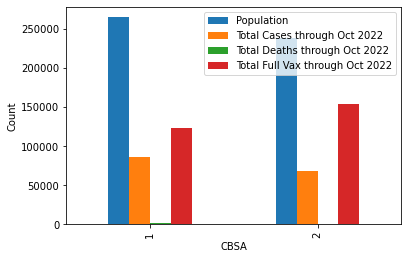

In [98]:
#Plotting Tier 1...
df1.plot(kind="bar")

plt.xlabel("CBSA")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

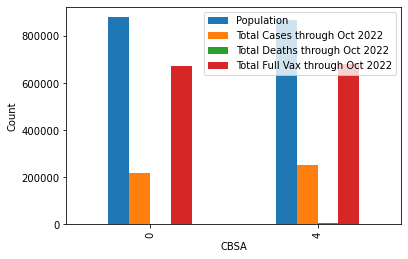

In [99]:
#Plotting Tier 2...
df2 = df.drop([1, 2, 3, 5])

df2.plot(kind="bar")


plt.xlabel("CBSA")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

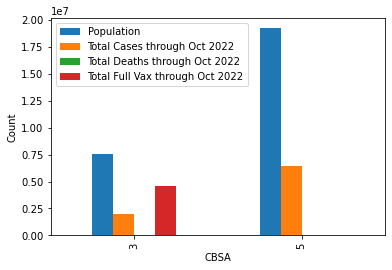

In [100]:
#Plotting Tier 3...
df3 = df.drop([0, 1, 2, 4])

df3.plot(kind="bar")

plt.xlabel("CBSA")
plt.ylabel("Count")

In [101]:
#Let's test our null hypothesis using an AnoVa... 

import scipy as sc
from scipy.stats import f_oneway

anova_df1= covid_demos[["Total Cases through Oct 2022"]]
anova_df2= covid_demos[["% of 25+ Adults Who Completed College 2016-2020"]]

f_oneway(anova_df1, anova_df2)

F_onewayResult(statistic=array([2.15985685]), pvalue=array([0.17240411]))

In [102]:
#Let's evaluate the relationship between COVID vaccinated individuals and the percentage of the population with college drees... 

import scipy as sc
from scipy.stats import f_oneway

anova_df2= covid_demos[["% of 25+ Adults Who Completed College 2016-2020"]]
anova_df3= covid_demos[["Total Full Vax through Oct 2022"]]

f_oneway(anova_df1, anova_df2)

F_onewayResult(statistic=array([2.15985685]), pvalue=array([0.17240411]))

In [103]:
#Let's test our null hypothesis a bit further using an AnoVa... 

import scipy as sc
from scipy.stats import f_oneway

alpha= 0.05 

anova_df2= covid_demos[["% of 25+ Adults Who Completed College 2016-2020"]]
anova_df4= covid_demos[["Total Deaths through Oct 2022"]]

f_oneway(anova_df1, anova_df4)


F_onewayResult(statistic=array([2.10824226]), pvalue=array([0.17714914]))

## This was me trying to visualize an anova table, but it is unfortunately to convoluted to be successful. :(

In [104]:
#Building our Analysis of Variance Table...

data = [['Between Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)


x_bar = df['Total Cases through Oct 2022'].mean()
SSTR = df.groupby('CBSA Name').count() * (df.groupby('CBSA Name').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Total Cases through Oct 2022'].sum()

SSE = (df.groupby('CBSA Name').count() - 1) * df.groupby('CBSA Name').std()**2

# calculate SSTR and update anova table
SSTR = SSTR['Total Cases through Oct 2022'].sum() + SSE['Total Cases through Oct 2022'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['CBSA Name'].nunique() - 1
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - sc.stats.f.cdf(F, anova_table['df']['Between Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = sc.stats.f.ppf(1-alpha, anova_table['df']['Between Groups'])

# Final ANOVA Table
anova_table

TypeError: _parse_args() missing 1 required positional argument: 'dfd'

KeyError: 'CBSA'

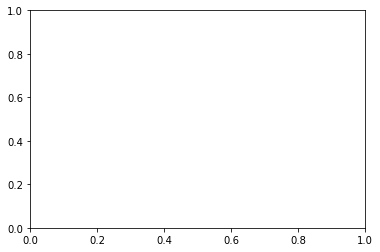